The task is to do some preprocessing on the images. You are not allowed to change the final model though, i.e., **you have to use a simple nearest neighbor model**!

In [2]:
import sys
import time
import numpy
numpy.random.seed(1)
import urllib
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

You have to download the [Python file](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz) from the [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) webpage. Please extract the tar.gz file and copy the files to the same directory as the notebook.

In [3]:
# code to parse the data, taken from https://github.com/keras-team/keras/blob/master/keras/datasets/cifar.py
from six.moves import cPickle
def load_batch(fpath, label_key='labels'):
    """Internal utility for parsing CIFAR data.
    # Arguments
        fpath: path the file to parse.
        label_key: key for label data in the retrieve
            dictionary.
    # Returns
        A tuple `(data, labels)`.
    """
    with open(fpath, 'rb') as f:
        if sys.version_info < (3,):
            d = cPickle.load(f)
        else:
            d = cPickle.load(f, encoding='bytes')
            # decode utf8
            d_decoded = {}
            for k, v in d.items():
                d_decoded[k.decode('utf8')] = v
            d = d_decoded
    data = d['data']
    labels = d[label_key]

    data = data.reshape(data.shape[0], 3, 32, 32)
    
    return data, labels

# training images
num_train_samples = 50000
Xtrain = numpy.empty((num_train_samples, 3, 32, 32), dtype='uint8')
ytrain = numpy.empty((num_train_samples,), dtype='uint8')
for i in range(1, 6):
    fpath = 'data_batch_' + str(i)
    (Xtrain[(i - 1) * 10000: i * 10000, :, :, :],
    ytrain[(i - 1) * 10000: i * 10000]) = load_batch(fpath)
Xtrain = Xtrain.transpose(0, 2, 3, 1)
ytrain = numpy.reshape(ytrain, (len(ytrain), 1)).ravel()

# test images
fpath = 'test_batch'
Xtest, ytest = load_batch(fpath)
ytest = numpy.reshape(ytest, (len(ytest), 1)).ravel()
Xtest = Xtest.transpose(0, 2, 3, 1)

print("Number of training images: {}".format(Xtrain.shape[0]))
print("Number of test images: {}".format(Xtest.shape[0]))
print("Shape of images: {}".format(Xtrain[0].shape))

Number of training images: 50000
Number of test images: 10000
Shape of images: (32, 32, 3)


Let us plot one image from each class ...

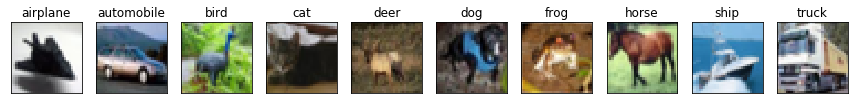

In [4]:
fig = plt.figure(figsize=(15,5))
class_names = ['airplane','automobile','bird','cat','deer', 'dog','frog','horse','ship','truck']

for i in range(10):
    
    # get first image of class i 
    idx = numpy.where(ytrain==i)[0][0]
    im = Xtrain[idx]
    
    # plot image
    ax = fig.add_subplot(1, 10, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    plt.imshow(im)
    
plt.show()

In [ ]:
# FIXME: CHANGE THIS CELL! 

algorithm = 'brute'
n_neighbors = 20

# IMPORTANT: If your steps depend on randomness, please use fixed 'seeds'
# to always obtain the same result (otherwise, you might get slightly
# different results for each run)

# Xtrain_new = ...
# Xtest_new = ...


# Note that both Xtrain_new and Xtest_new have to be 
# 2-dimensional arrays, i.e., they must be of shape
# (n, d) for n samples each having d features.
#
# TODO: reshape Xtrain_new and Xtest_new

In [ ]:
# YOU ARE NOT ALLOWED TO CHANGE THIS CELL :-)

# fit kNN model
model = KNeighborsClassifier(n_neighbors=n_neighbors, algorithm=algorithm)
model.fit(Xtrain_new, ytrain)

# compute accuracy
preds = model.predict(Xtest_new)
acc = accuracy_score(ytest, preds)
print("Final accuracy: {}".format(acc))